In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
%matplotlib inline

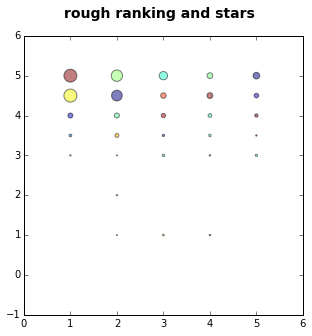

In [2]:
# explore the correlation between ranking and rating
ranking_and_star=pd.read_csv("Ranking_and_Star.csv")
ranking_for_star=ranking_and_star["ranking"]
star=ranking_and_star["star"]
# can explore the ranking correlation within any ranking range, e.g. top 100, top 200...
# for now, assume the range is all data
minVal=min(ranking_for_star)
maxVal=max(ranking_for_star)
intervals=5
distance=int((maxVal-minVal)/5)
cutoffs=[minVal+i*distance for i in range(intervals)]
cutoffs.append(maxVal)

# use rough ranking instead of true ranking to make ranking more condensed
rough_ranking_for_star_dict={i:[] for i in range(1,intervals+1)}
for i in range(len(ranking_for_star)):
    for j in range(1,intervals+1):
        if(ranking_for_star[i]<=cutoffs[j]):
            rough_ranking_for_star_dict[j].append(star[i])
            break

all_keys=list(sorted(rough_ranking_for_star_dict.keys()))

# ratings categorical
possible_stars=[i*0.5 for i in range(0,11)]

indices=[(i,j) for i in all_keys for j in possible_stars]

data=[rough_ranking_for_star_dict[i[0]].count(i[1]) for i in indices]
radius=[np.pi*(i**2) for i in data]

x,y=zip(*indices)

fig=plt.figure(figsize=[5,5])
fig.suptitle("rough ranking and stars",fontsize=14,fontweight="bold")
plt.scatter(x,y,s=data,c=np.random.rand(len(x)),alpha=0.5)

# the x-axis 1,2,3,4,5 correspond to tire 1 ranking(1-200), tier 2 ranking(201-400), etc.
# as shown in the picture, the size of circle (indicating the number of data points in each category, i.e. 
# the combination of stars and ranking) decreases as ranking decreases and number of stars decreases
# so there is a correlation between ranking and rating

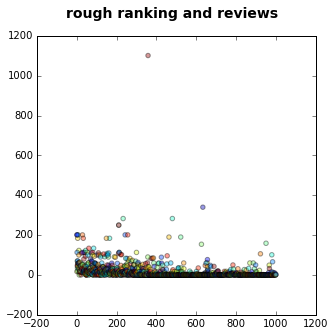

In [3]:
# explore the correlation between ranking and numReviews
ranking_and_review=pd.read_csv("Ranking_and_Reviews.csv")
ranking_for_reviews=ranking_and_review["ranking"]
reviews=ranking_and_review["numReviews"]

# again, can explore the correlation within any ranking range, e.g. top 100, top 200...
# for now, assume the range is all data

fig=plt.figure(figsize=[5,5])
fig.suptitle("rough ranking and reviews",fontsize=14,fontweight="bold")
plt.scatter(ranking_for_reviews,reviews,s=20,c=np.random.rand(len(reviews)),alpha=0.4)
# as shown in the picture, the higher the ranking is, the more reviews the majority of data has
# so there is a correlation between number of reviews and ranking

In [4]:
# visualize search result percentage of each brand, given time range and search word
# prepare input data
df=pd.read_csv("Cereal_Data.csv")
df["Time"]=df.apply(lambda row: datetime.strptime(row["Time"],"%Y-%m-%d %H:%M:%S"), axis=1)

time_start=datetime(2015,11,22,10,40,0)
time_end=datetime(2015,11,23,19,0,0)

In [5]:
# draw a pie chart to show percentage of all/ top3 results on Walmart, 
# given a set of competitor brand, time range and search term

# input: the preprocessed data set, time range lower bound, time range upper bound, and research type
# the options of research type: "(cold_cereal, top3)", "(cold_cereal, all)", "(cereal, top3)", "(cereal, all)"
# note the space in the tuple

def market_share(data,time_start, time_end, explore_type):
    label=df.columns[0]
    data_range=df[(df["Time"]>time_start) & (df["Time"]<time_end)]
    
    explore_type_data=data_range[data_range[label]==explore_type]
    explore_type_sum=[explore_type_data.sum(0)[i] for i in range(5)]

    labels="Cheerios","Kashi","Kellogg's","Other","Post"
    colors=["gold","lightskyblue","green","lightcoral","yellowgreen"]
    fig=plt.figure(figsize=[5,5])
    fig.suptitle(explore_type,fontsize=14,fontweight="bold")
    plt.pie(explore_type_sum,labels=labels,colors=colors,autopct="%1.1f%%")
    plt.legend(labels,loc="lower right")

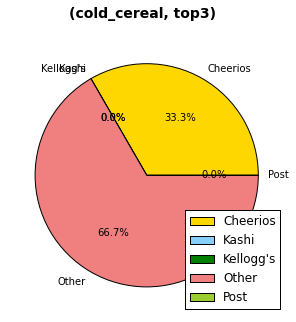

In [6]:
market_share(df,time_start,time_end,"(cold_cereal, top3)")

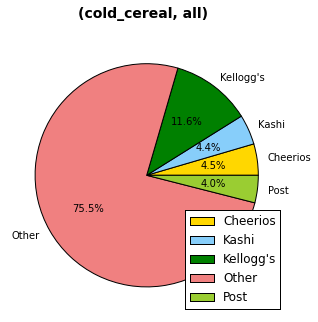

In [7]:
market_share(df,time_start,time_end,"(cold_cereal, all)")

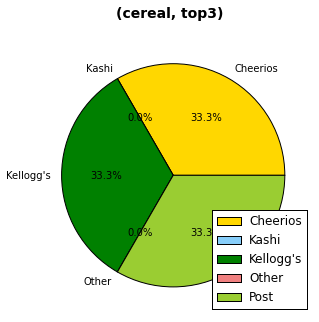

In [8]:
market_share(df,time_start,time_end,"(cereal, top3)")

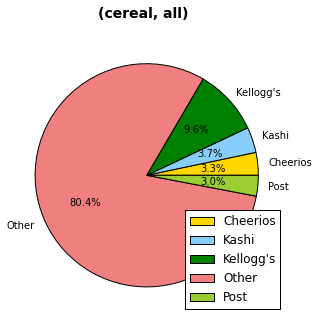

In [9]:
market_share(df,time_start,time_end,"(cereal, all)")